# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
m, c = 4, 7

In [3]:
X = np.linspace(-50, 50, 100).reshape(-1, 1)

In [4]:
np.random.seed(42)
noise = np.random.normal(0, 10, X.shape[0])
Y = (m * X.flatten()) + c + noise

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
learned_m = model.coef_[0]
learned_c = model.intercept_
print(f"Learned Equation: y = {learned_m:.2f}x + {learned_c:.2f}")

Learned Equation: y = 4.01x + 5.80


In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [9]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTrain Performance:")
print(f"MAE: {train_mae:.2f}")
print(f"MSE: {train_mse:.2f}")
print(f"R²: {train_r2:.4f}")

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Performance:")
print(f"MAE: {test_mae:.2f}")
print(f"MSE: {test_mse:.2f}")
print(f"R²: {test_r2:.4f}")


Train Performance:
MAE: 7.44
MSE: 86.35
R²: 0.9937

Test Performance:
MAE: 6.01
MSE: 62.20
R²: 0.9953


The model performed really well. It almost perfectly captured the original equation, with an R² above 99%, which means it explains the relationship between X and Y very accurately. The training and testing errors are very close, so there’s no sign of overfitting or underfitting. Overall, the model is a great fit for this data.

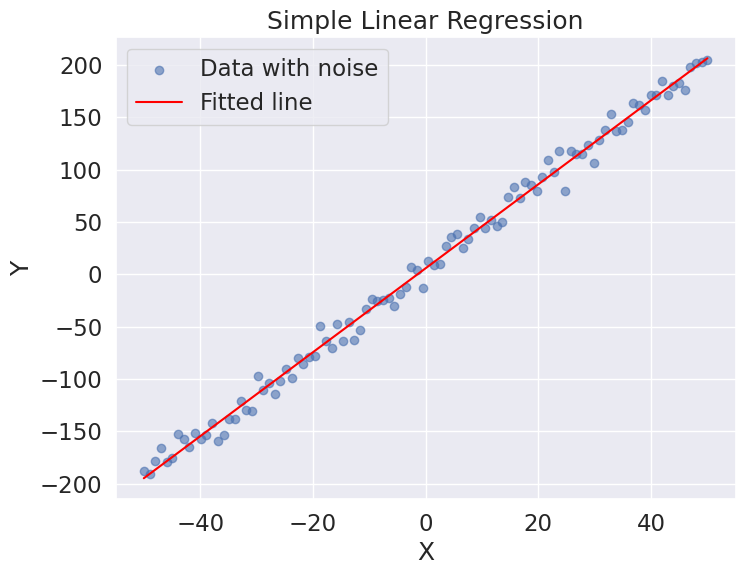

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, label="Data with noise", alpha=0.6)
plt.plot(X, model.predict(X), color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [11]:
a1, a2, c = 3.5, -2.0, 10.0

In [12]:
np.random.seed(42)
n = 300
x1 = np.random.uniform(-20, 20, n)
x2 = np.random.uniform(0, 50, n)

In [13]:
noise = np.random.normal(0, 8, n)
y = a1 * x1 + a2 * x2 + c + noise

In [14]:
X = np.column_stack((x1, x2))
Y = y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
learned_a1, learned_a2 = model.coef_
learned_c = model.intercept_

print(f"Original equation: y = {a1:.2f}x1 + {a2:.2f}x2 + {c:.2f}")
print(f"Learned equation : y = {learned_a1:.2f}x1 + {learned_a2:.2f}x2 + {learned_c:.2f}")

Original equation: y = 3.50x1 + -2.00x2 + 10.00
Learned equation : y = 3.44x1 + -2.06x2 + 11.26


In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [18]:
print("\nTrain Performance")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"R² : {r2_score(y_train, y_train_pred):.4f}")

print("\nTest Performance")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"R² : {r2_score(y_test, y_test_pred):.4f}")


Train Performance
MAE: 6.218
MSE: 60.792
R² : 0.9799

Test Performance
MAE: 6.946
MSE: 78.971
R² : 0.9680


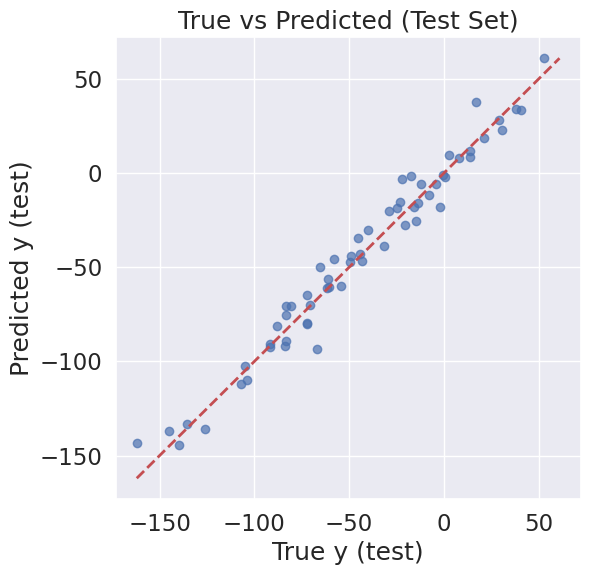

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.xlabel("True y (test)")
plt.ylabel("Predicted y (test)")
plt.title("True vs Predicted (Test Set)")
plt.show()

The model performed really well. It learned coefficients very close to the original ones, and the R² scores are very high (around 0.97–0.98). Training and testing errors are close, which means the model generalizes well. There’s no sign of overfitting or underfitting

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
a, b, c = 2.0, -3.0, 5.0

In [22]:
np.random.seed(42)
X = np.linspace(-10, 10, 200).reshape(-1, 1)
noise = np.random.normal(0, 10, X.shape[0])
y = a * (X.flatten()**2) + b * X.flatten() + c + noise

In [23]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
learned_b = model.coef_[0]
learned_a = model.coef_[1]
learned_c = model.intercept_

print(f"Original equation: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")
print(f"Learned equation : y = {learned_a:.2f}x^2 + {learned_b:.2f}x + {learned_c:.2f}")

Original equation: y = 2.00x^2 + -3.00x + 5.00
Learned equation : y = 2.00x^2 + -2.92x + 4.26


In [27]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [28]:
print("\nTrain Performance")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"R² : {r2_score(y_train, y_train_pred):.4f}")

print("\nTest Performance")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"R² : {r2_score(y_test, y_test_pred):.4f}")


Train Performance
MAE: 7.373
MSE: 88.047
R² : 0.9793

Test Performance
MAE: 7.343
MSE: 77.481
R² : 0.9700


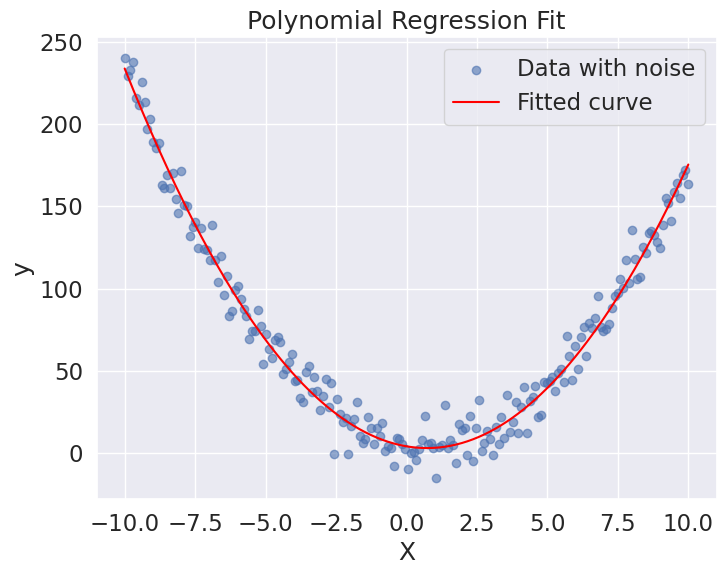

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, label="Data with noise", alpha=0.6)
plt.plot(X, model.predict(X_poly), color="red", label="Fitted curve")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

The model fits the quadratic relationship well. The coefficients are close to the original ones, and both train and test R² scores are high with similar errors. This shows the model generalizes well, with no overfitting or underfitting.

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [30]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [31]:
os.listdir(path)

['airlines_flights_data.csv']

In [32]:
full_path = os.path.join(path,os.listdir(path)[0])

In [33]:
import pandas as pd
df = pd.read_csv(full_path)

In [34]:
df

index   airline   flight source_city departure_time stops  \
0            0  SpiceJet  SG-8709       Delhi        Evening  zero   
1            1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2            2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3            3   Vistara   UK-995       Delhi        Morning  zero   
4            4   Vistara   UK-963       Delhi        Morning  zero   
...        ...       ...      ...         ...            ...   ...   
300148  300148   Vistara   UK-822     Chennai        Morning   one   
300149  300149   Vistara   UK-826     Chennai      Afternoon   one   
300150  300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151  300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152  300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

In [35]:
df.drop(columns=['index'], inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [37]:
df.describe()

duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000

In [38]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

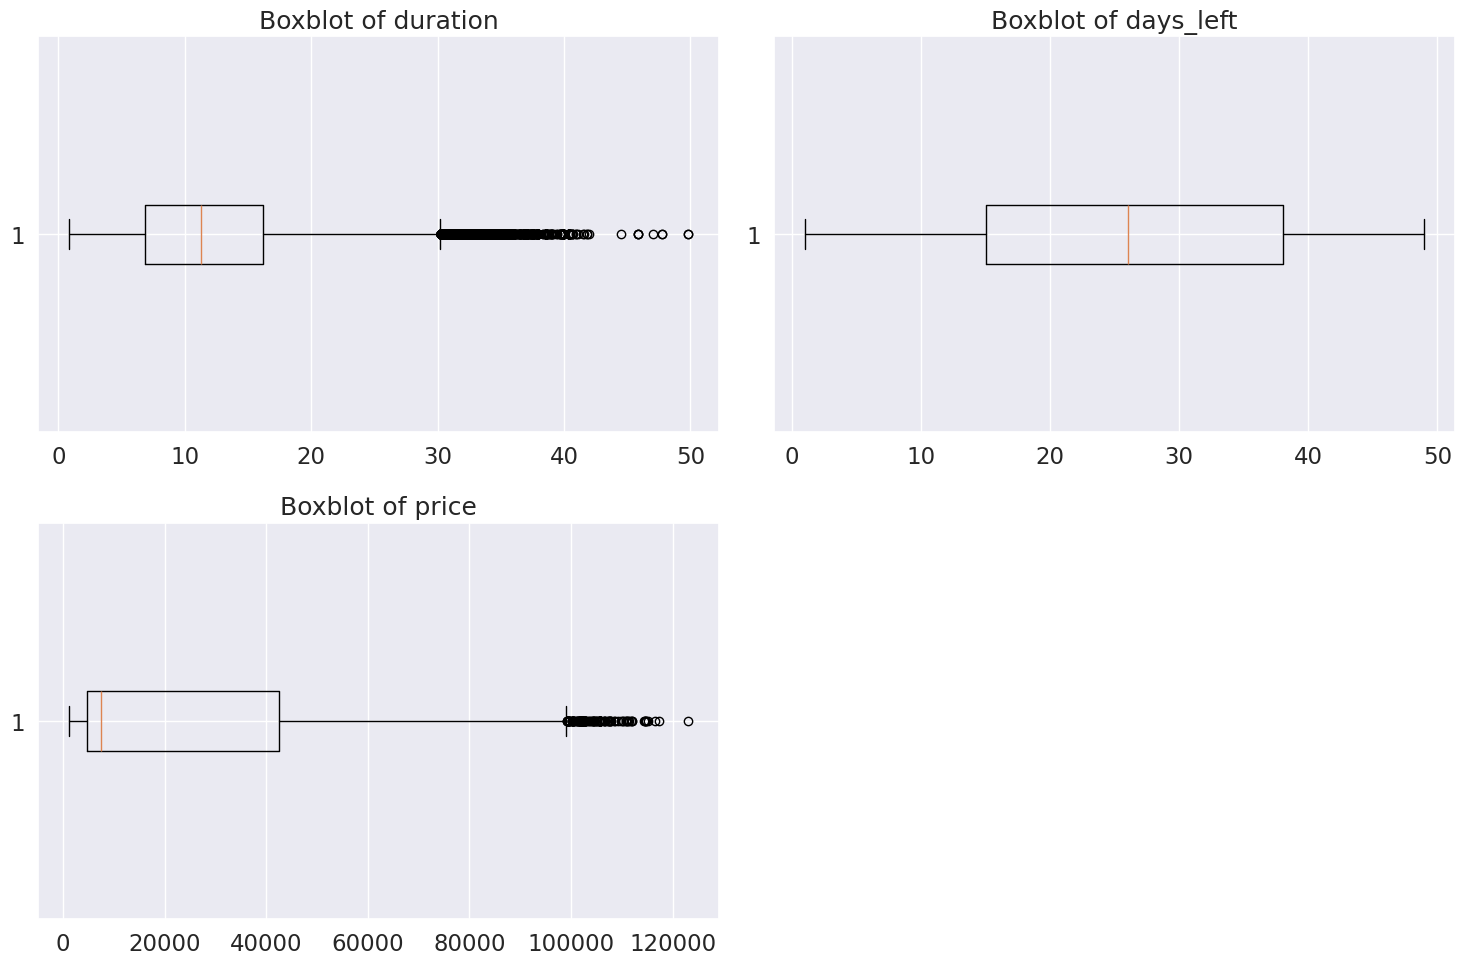

In [41]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boxblot of {column}')

plt.tight_layout()
plt.show()

In [42]:
df.head(2)

airline   flight source_city departure_time stops arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero        Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero      Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953

In [43]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

/tmp/ipython-input-211193672.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='airline',order = order, palette="Set2")


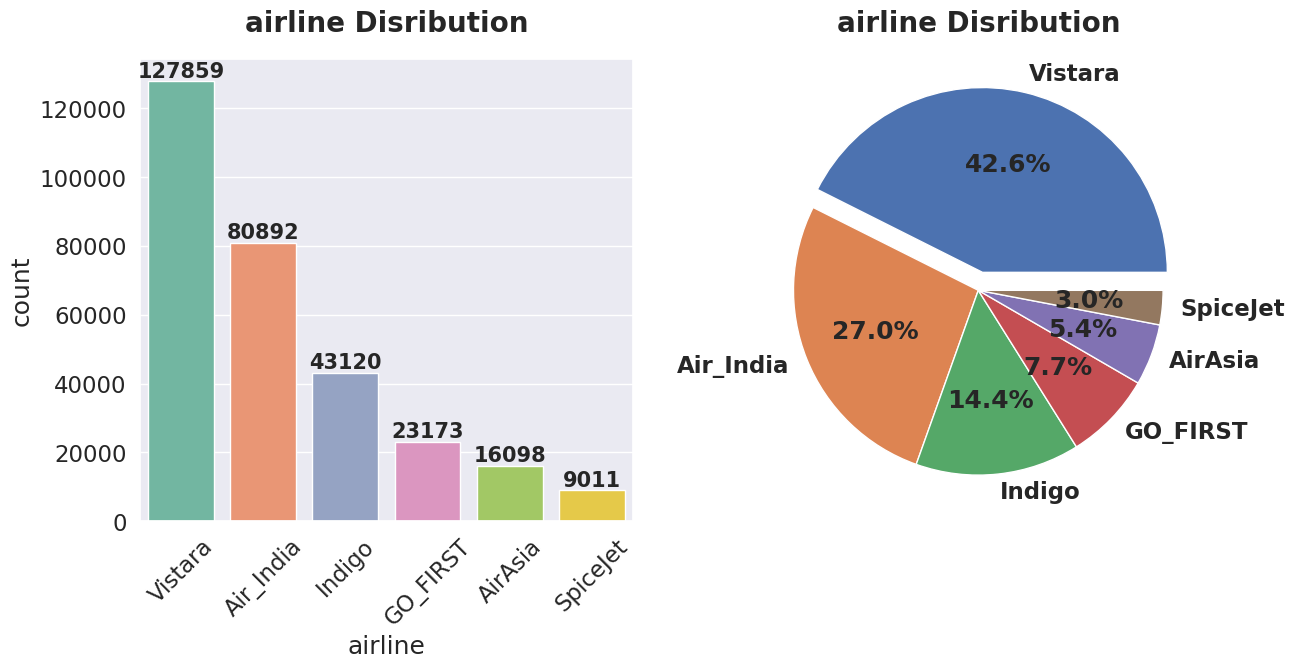

In [44]:
count = df['airline'].value_counts()
order = df['airline'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='airline',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('airline')
plt.xticks(rotation=45)
plt.title("airline Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0])
plt.title("airline Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [45]:
df['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64

In [46]:
df["flight"] = df["flight"].str.split("-").str[0]

In [47]:
df['flight'].value_counts()

flight
UK          127859
AI           80892
6E           38364
G8           23173
I5           16098
SG            9011
6.00E         4705
0.00E+00        51
Name: count, dtype: int64

In [48]:
df.drop(df[df['flight'] == '0.00E+00'].index, inplace=True)

In [49]:
df['flight'] = df['flight'].replace('6.00E', '6E')

In [50]:
df['flight'].value_counts()

flight
UK    127859
AI     80892
6E     43069
G8     23173
I5     16098
SG      9011
Name: count, dtype: int64

/tmp/ipython-input-3867610337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='flight',order = order, palette="Set2")


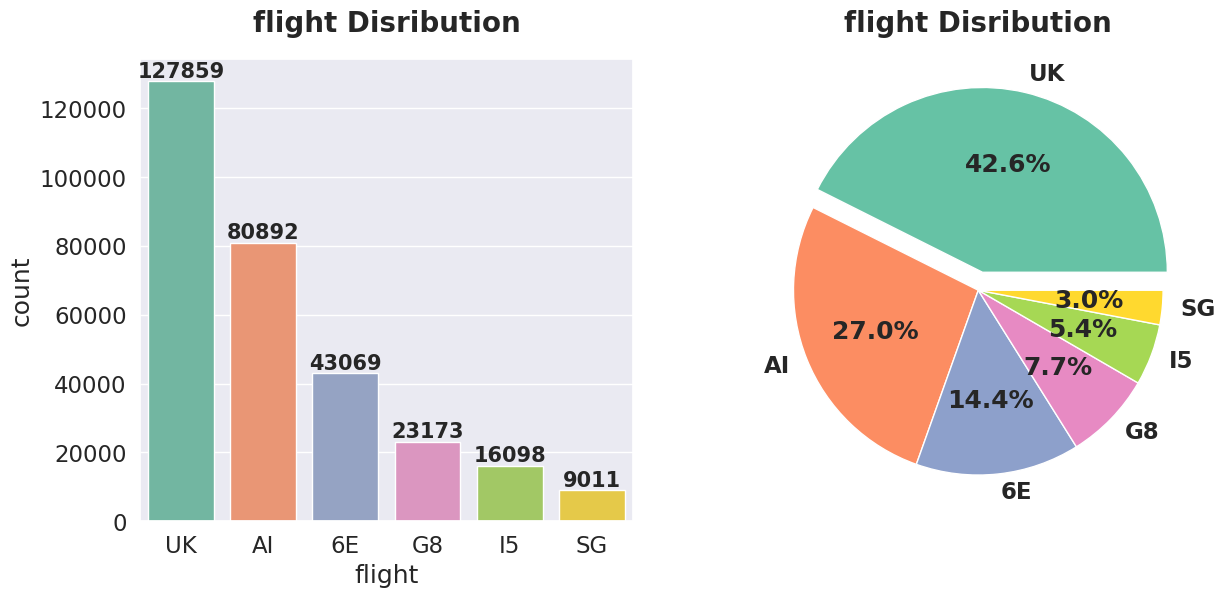

In [51]:
count = df['flight'].value_counts()
order = df['flight'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='flight',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('flight')
plt.title("flight Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0])
plt.title("flight Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [52]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52010
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

/tmp/ipython-input-3524540201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='source_city',order = order, palette="Set2")


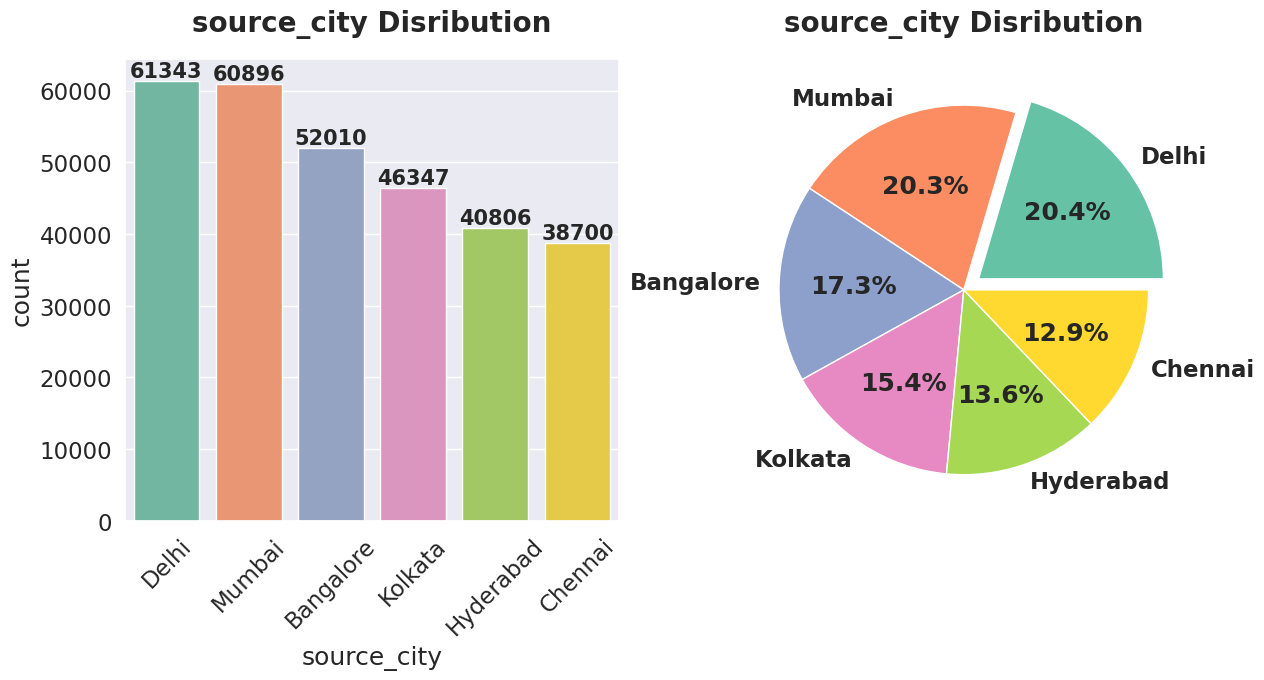

In [53]:
count = df['source_city'].value_counts()
order = df['source_city'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='source_city',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('source_city')
plt.xticks(rotation=45)
plt.title("source_city Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0])
plt.title("source_city Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [54]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65051
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

/tmp/ipython-input-537328679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='departure_time',order = order, palette="Set2")


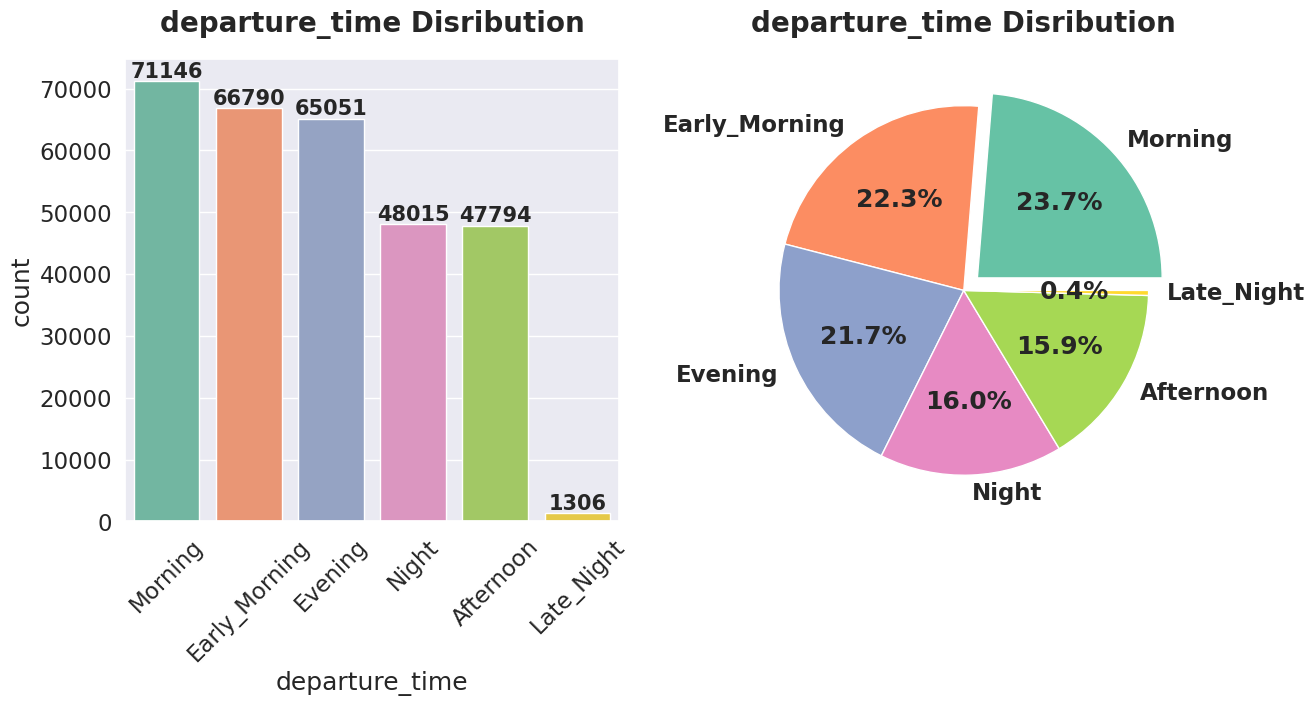

In [55]:
count = df['departure_time'].value_counts()
order = df['departure_time'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='departure_time',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('departure_time')
plt.xticks(rotation=45)
plt.title("departure_time Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0])
plt.title("departure_time Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [56]:
df['stops'].value_counts()

stops
one            250812
zero            36004
two_or_more     13286
Name: count, dtype: int64

/tmp/ipython-input-2215247566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='stops',order = order, palette="Set2")


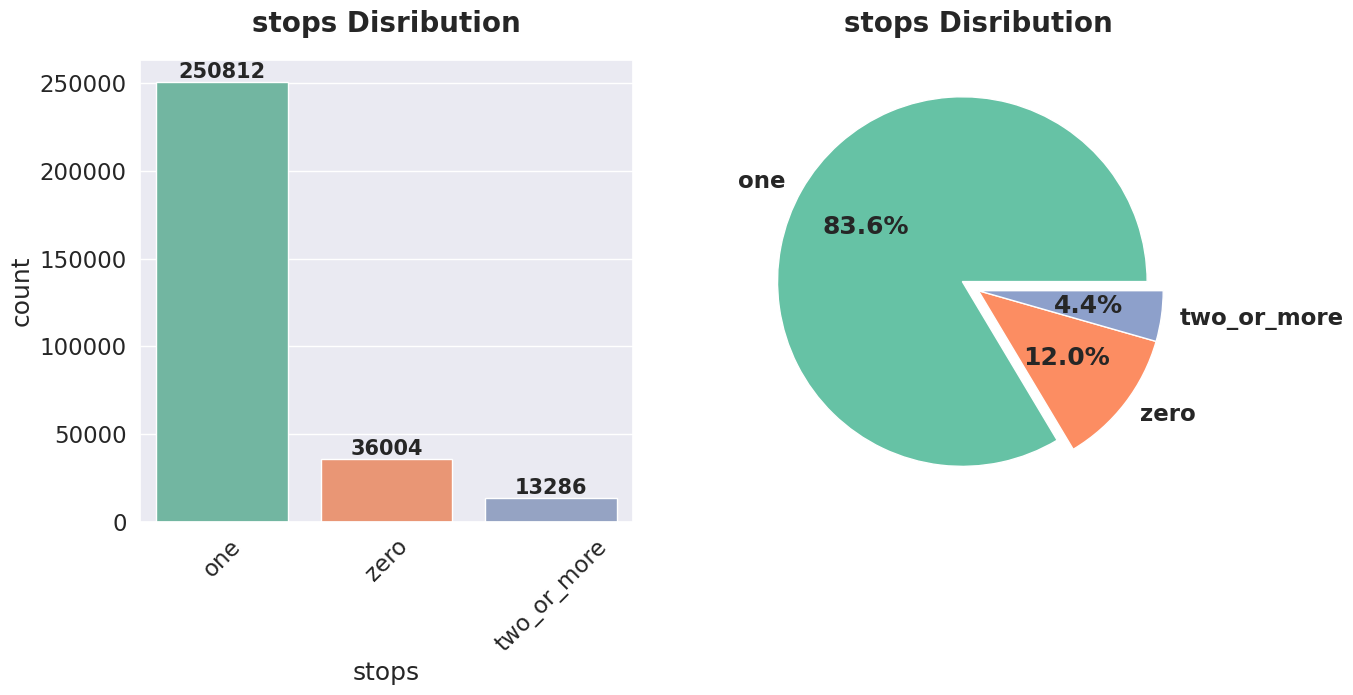

In [57]:
count = df['stops'].value_counts()
order = df['stops'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='stops',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('stops')
plt.xticks(rotation=45)
plt.title("stops Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0])
plt.title("stops Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [58]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       13950
Name: count, dtype: int64

/tmp/ipython-input-1072790827.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='arrival_time',order = order, palette="Set2")


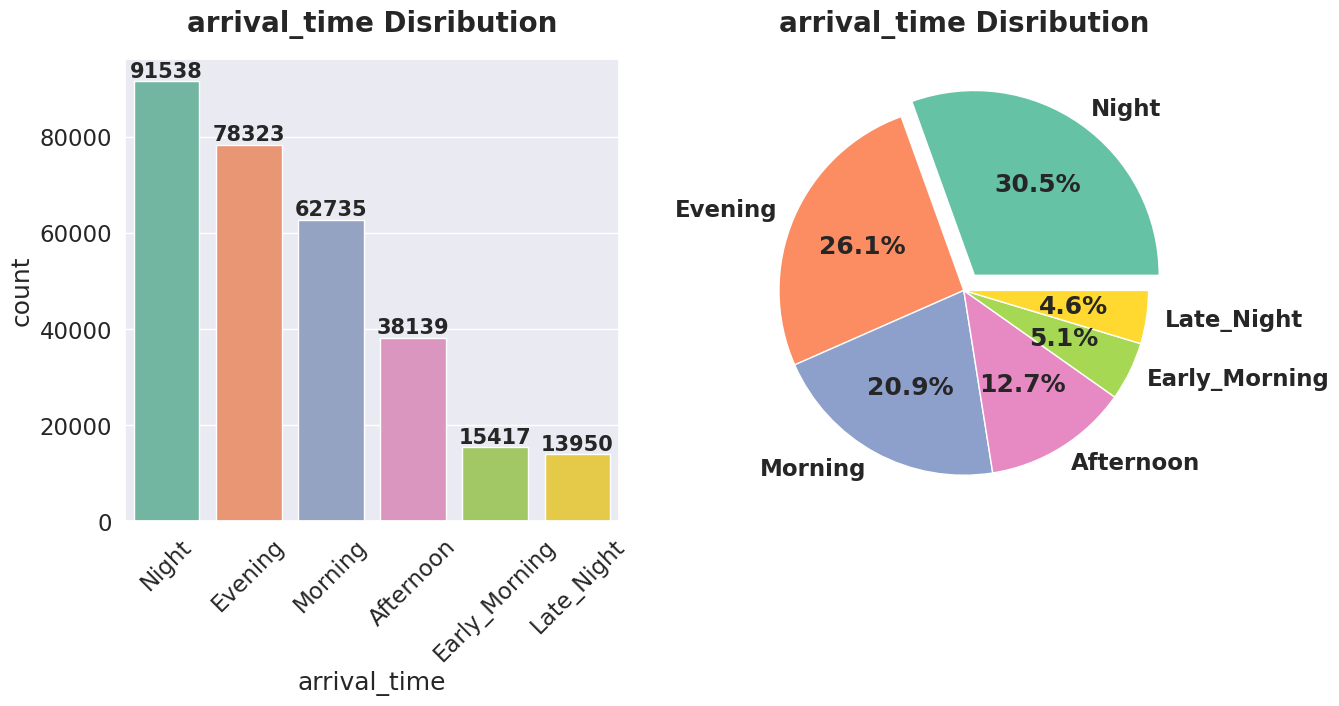

In [59]:
count = df['arrival_time'].value_counts()
order = df['arrival_time'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='arrival_time',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('arrival_time')
plt.xticks(rotation=45)
plt.title("arrival_time Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0])
plt.title("arrival_time Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [60]:
df['destination_city'].value_counts()

destination_city
Mumbai       59046
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

/tmp/ipython-input-1510387622.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='destination_city',order = order, palette="Set2")


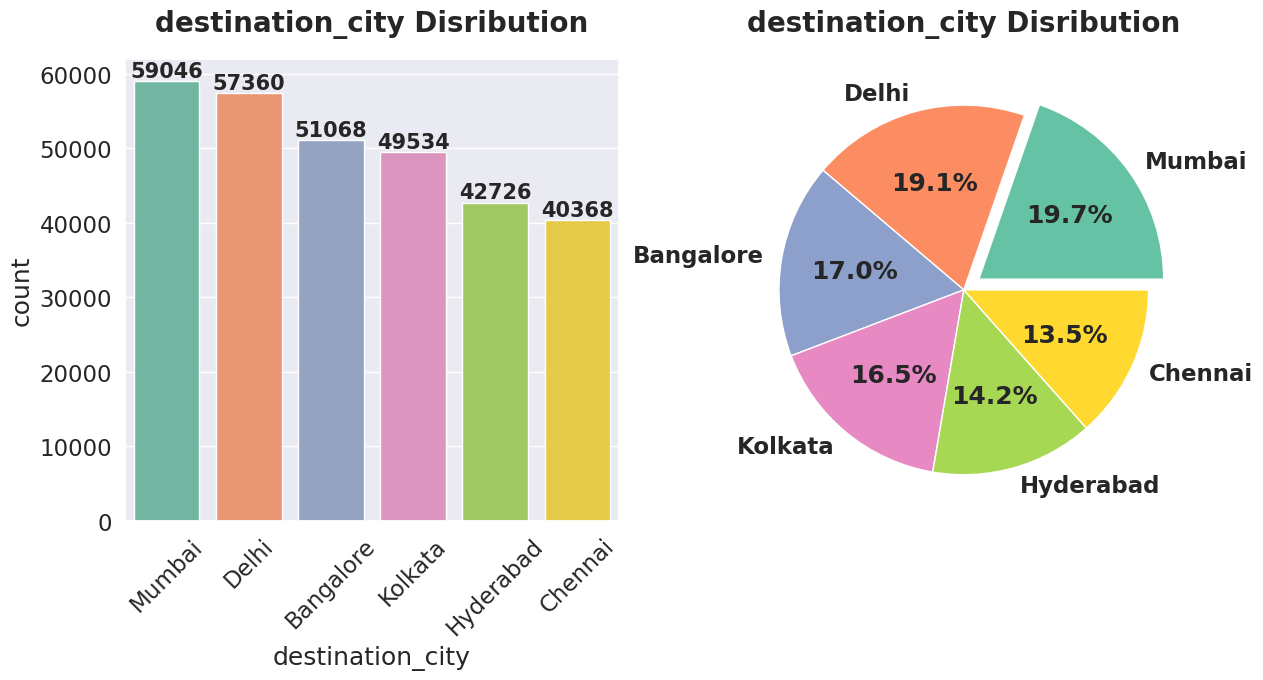

In [61]:
count = df['destination_city'].value_counts()
order = df['destination_city'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='destination_city',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('destination_city')
plt.xticks(rotation=45)
plt.title("destination_city Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0])
plt.title("destination_city Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [62]:
df['class'].value_counts()

class
Economy     206615
Business     93487
Name: count, dtype: int64

/tmp/ipython-input-2065806304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='class',order = order, palette="Set2")


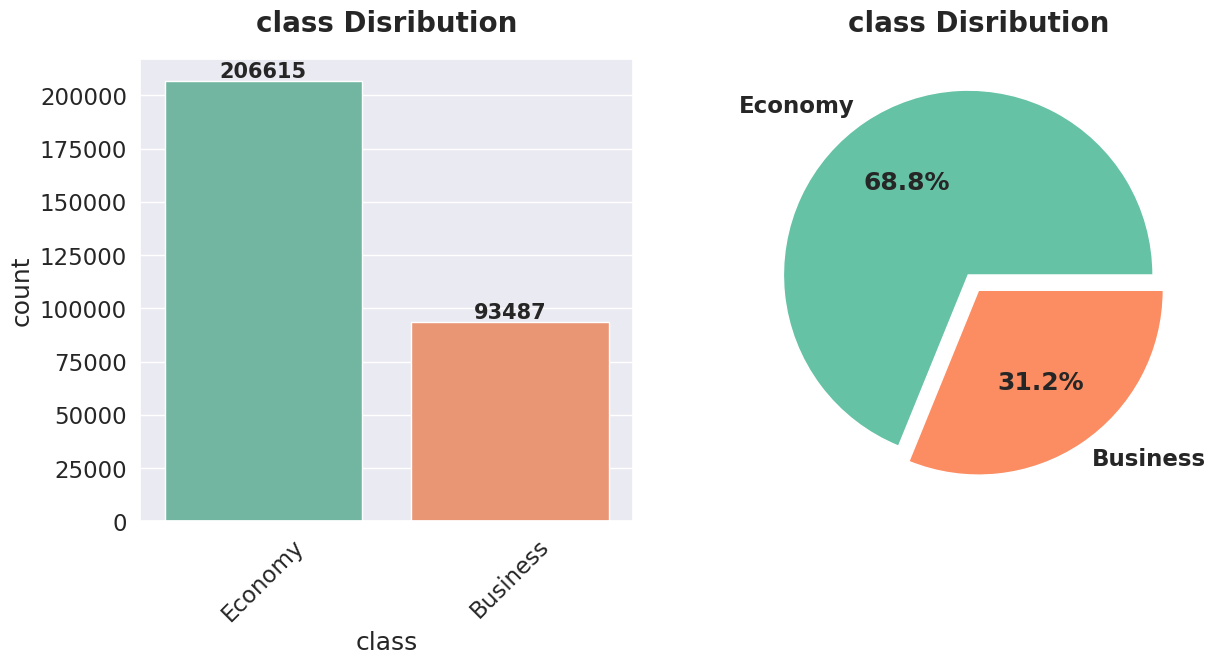

In [63]:
count = df['class'].value_counts()
order = df['class'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='class',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('class')
plt.xticks(rotation=45)
plt.title("class Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0])
plt.title("class Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [64]:
df['duration'].describe()

count    300102.000000
mean         12.222089
std           7.192126
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

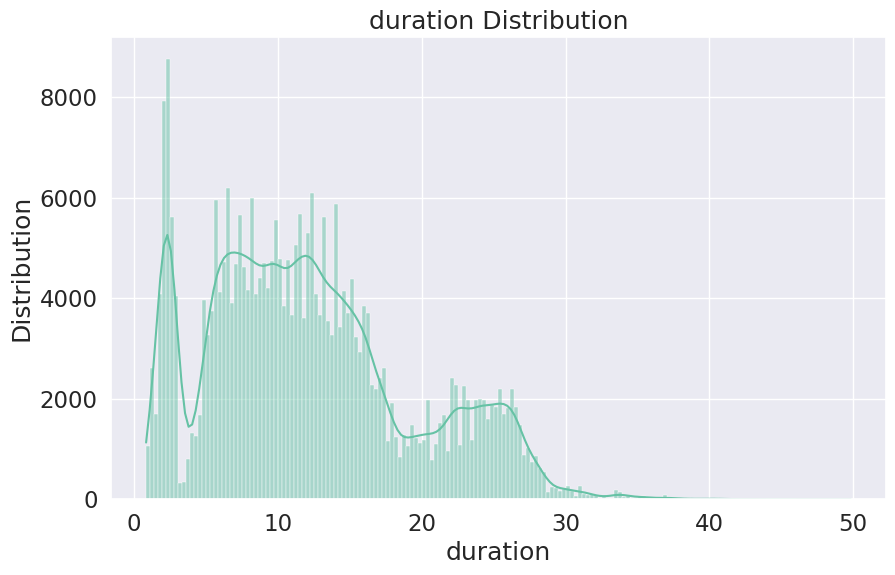

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True)
plt.xlabel('duration')
plt.ylabel('Distribution')
plt.title('duration Distribution')

plt.show()

In [66]:
df['days_left'].describe()

count    300102.000000
mean         26.003859
std          13.561643
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

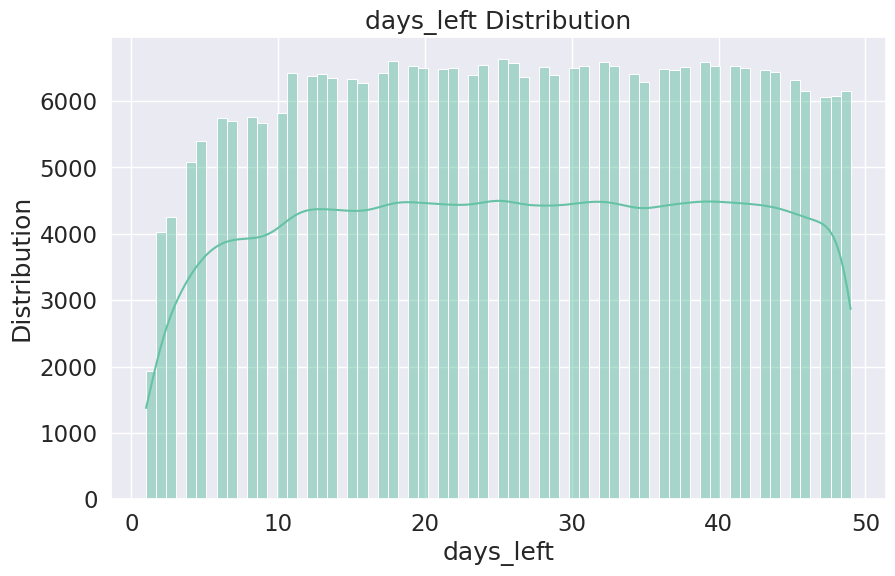

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df['days_left'], kde=True)
plt.xlabel('days_left')
plt.ylabel('Distribution')
plt.title('days_left Distribution')

plt.show()

In [68]:
df['price'].describe()

count    300102.000000
mean      20892.497374
std       22698.647167
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

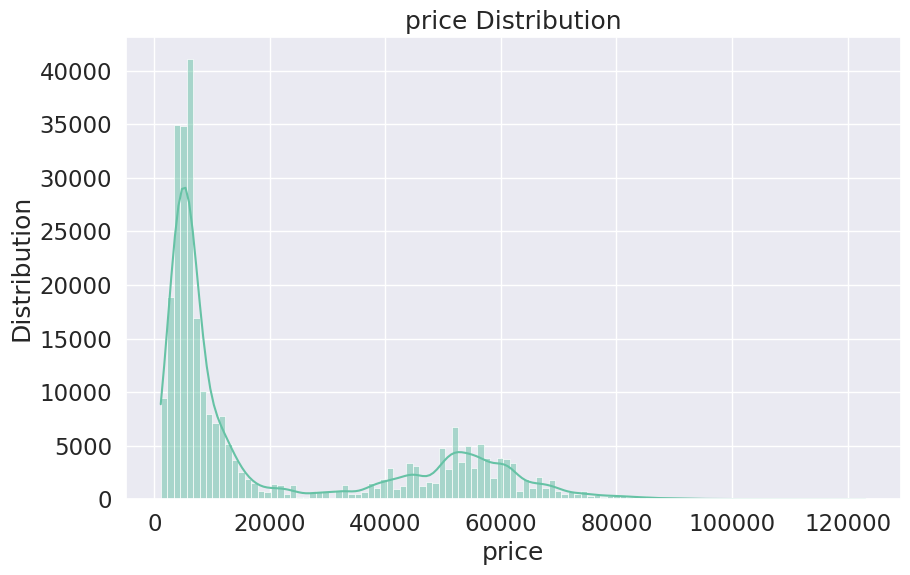

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.xlabel('price')
plt.ylabel('Distribution')
plt.title('price Distribution')

plt.show()

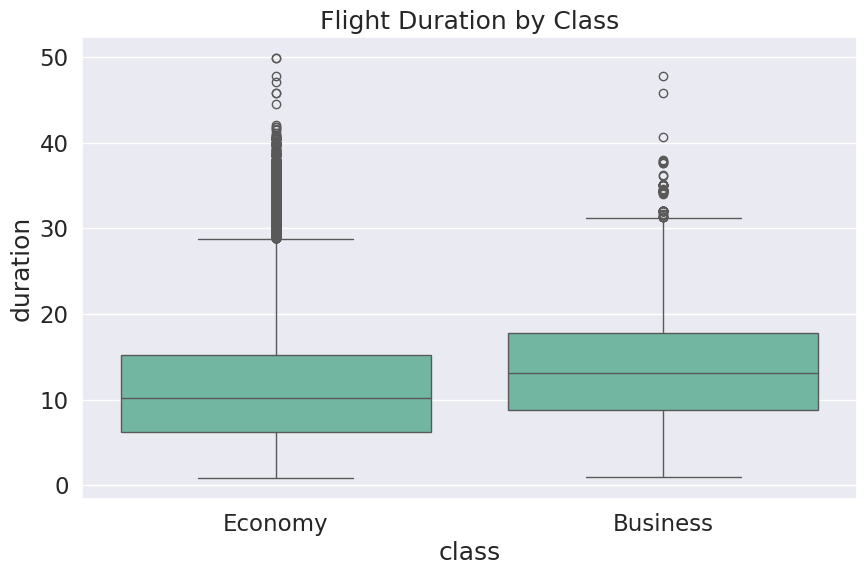

In [70]:
plt.figure(figsize=(10,6))
sns.boxplot(x="class", y="duration", data=df)
plt.title("Flight Duration by Class")
plt.show()

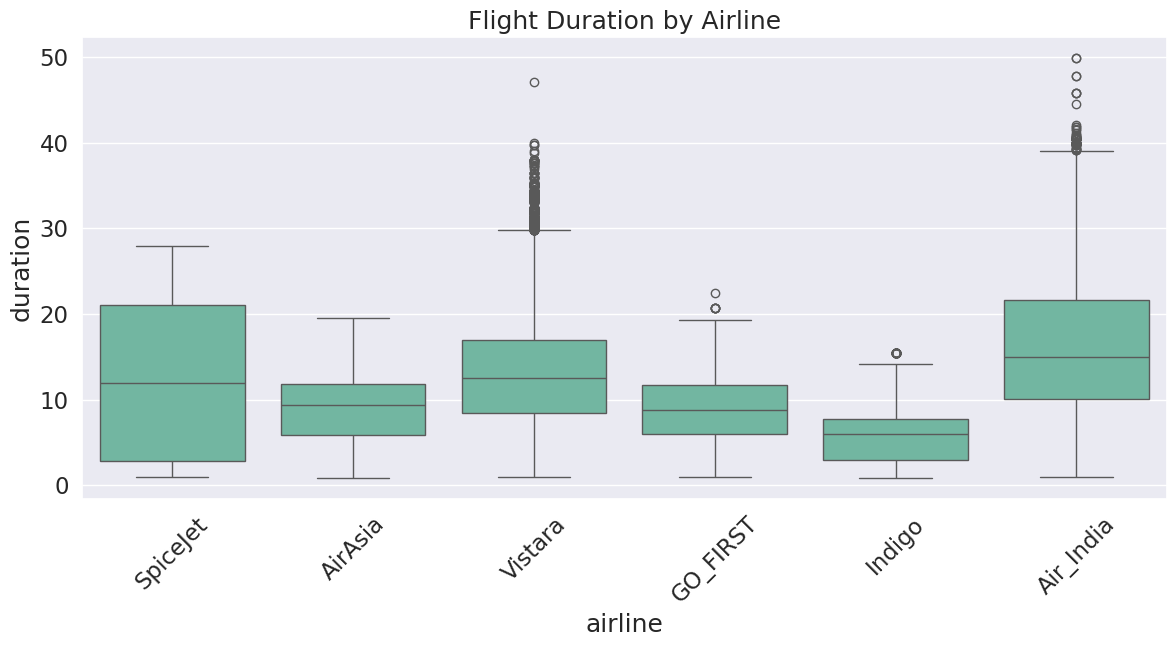

In [71]:
plt.figure(figsize=(14,6))
sns.boxplot(x="airline", y="duration", data=df)
plt.title("Flight Duration by Airline")
plt.xticks(rotation=45)
plt.show()

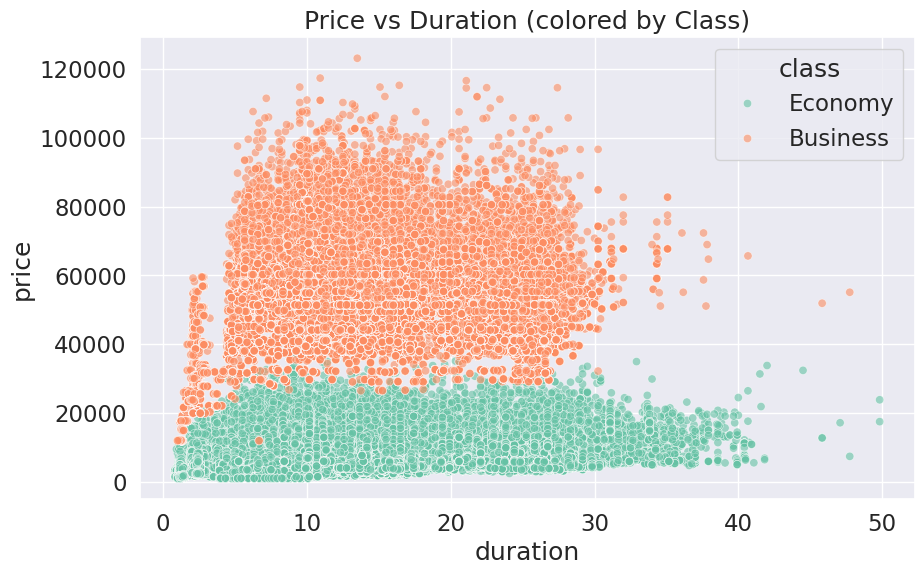

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="duration", y="price", hue="class", data=df, alpha=0.6)
plt.title("Price vs Duration (colored by Class)")
plt.show()

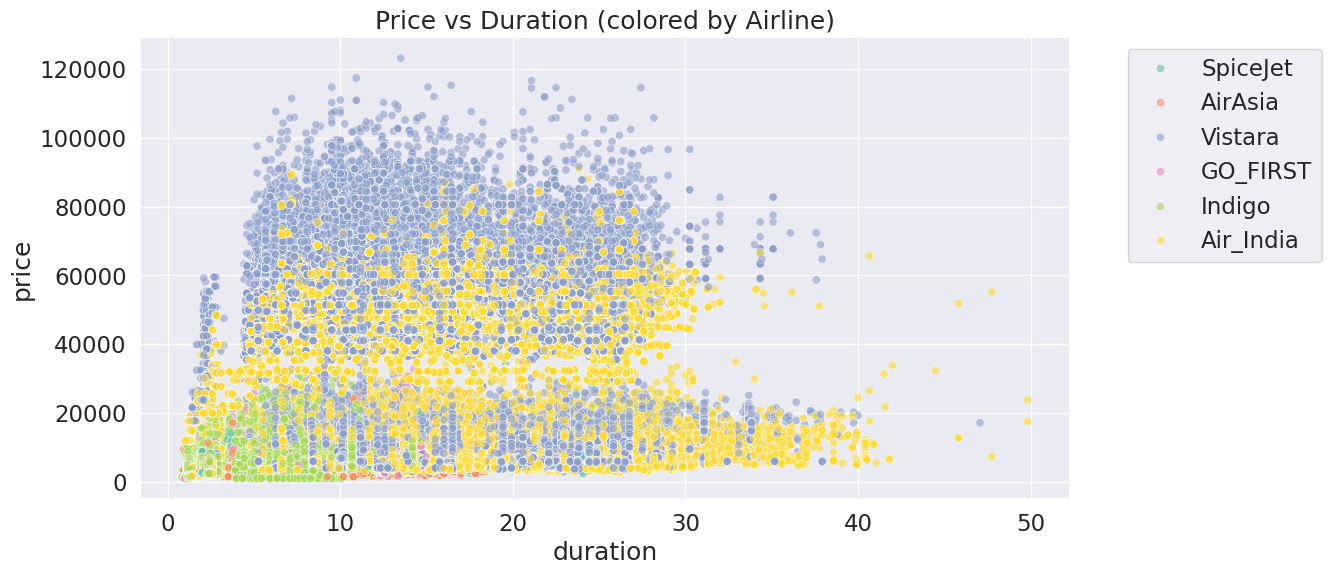

In [73]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="duration", y="price", hue="airline", data=df, alpha=0.6)
plt.title("Price vs Duration (colored by Airline)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

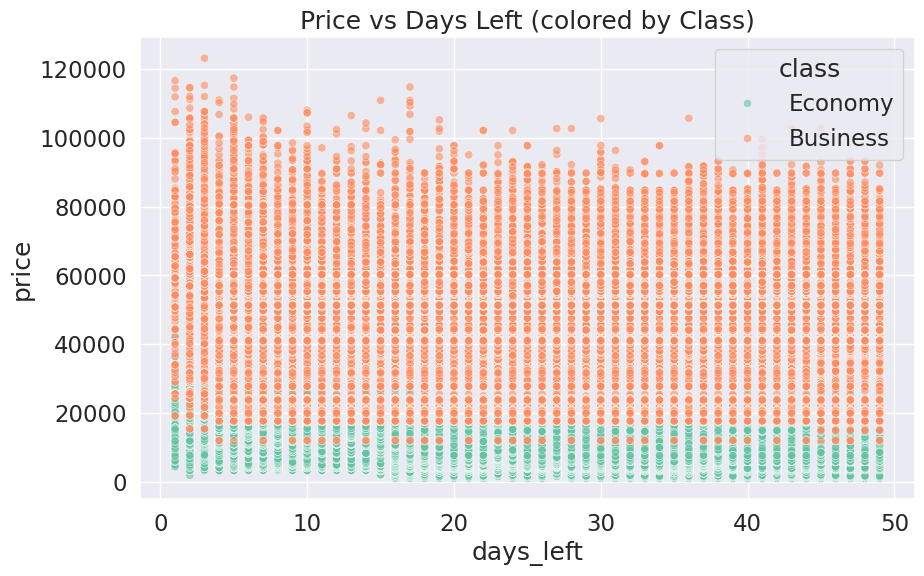

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="days_left", y="price", hue="class", data=df, alpha=0.6)
plt.title("Price vs Days Left (colored by Class)")
plt.show()

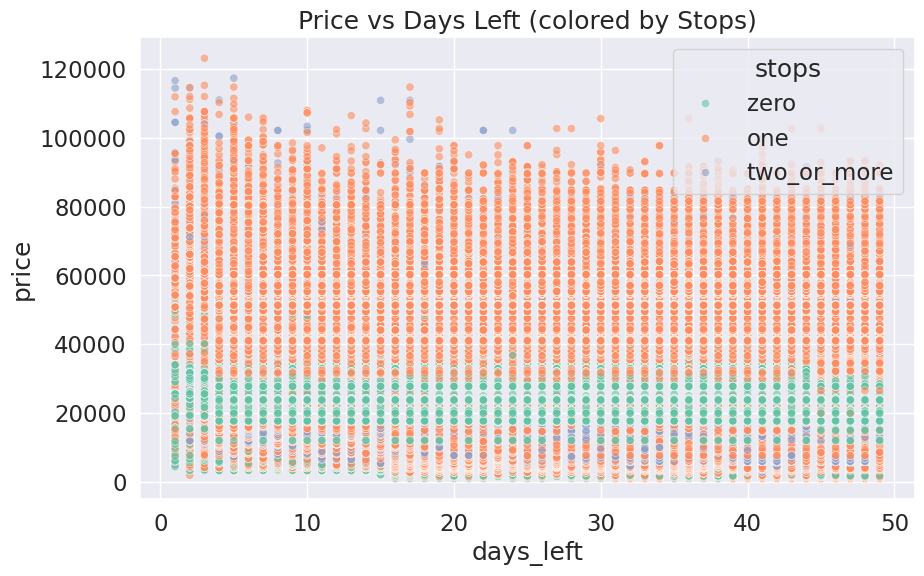

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="days_left", y="price", hue="stops", data=df, alpha=0.6)
plt.title("Price vs Days Left (colored by Stops)")
plt.show()

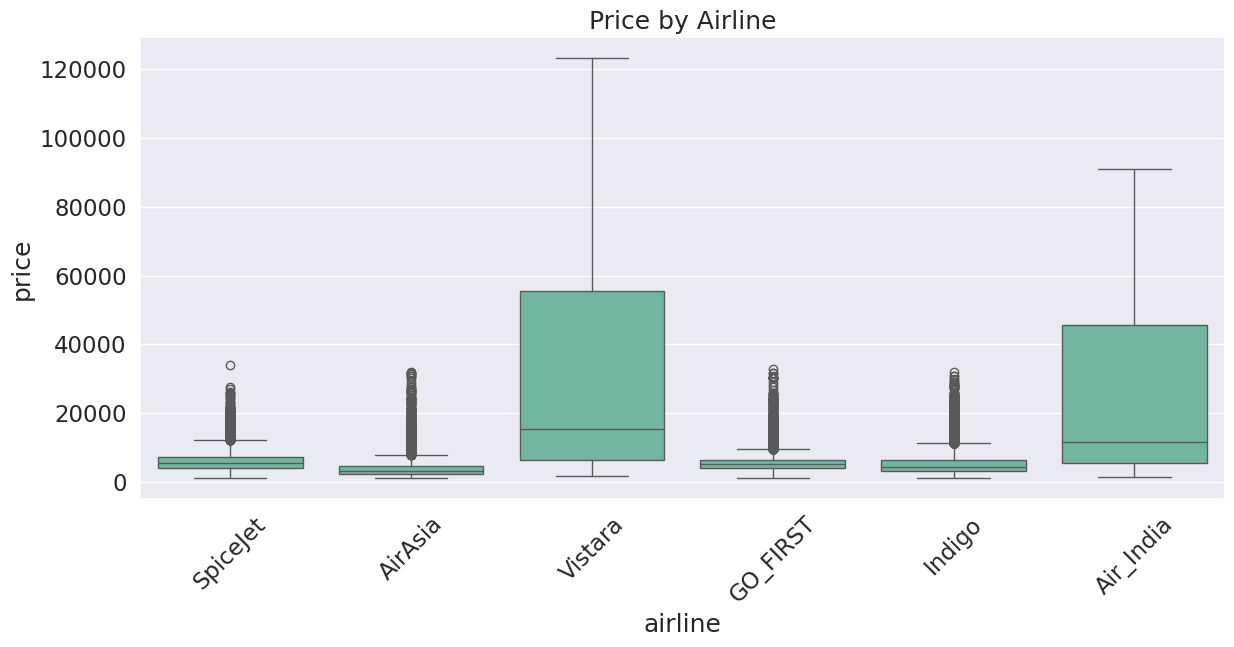

In [76]:
plt.figure(figsize=(14,6))
sns.boxplot(x="airline", y="price", data=df)
plt.title("Price by Airline")
plt.xticks(rotation=45)
plt.show()

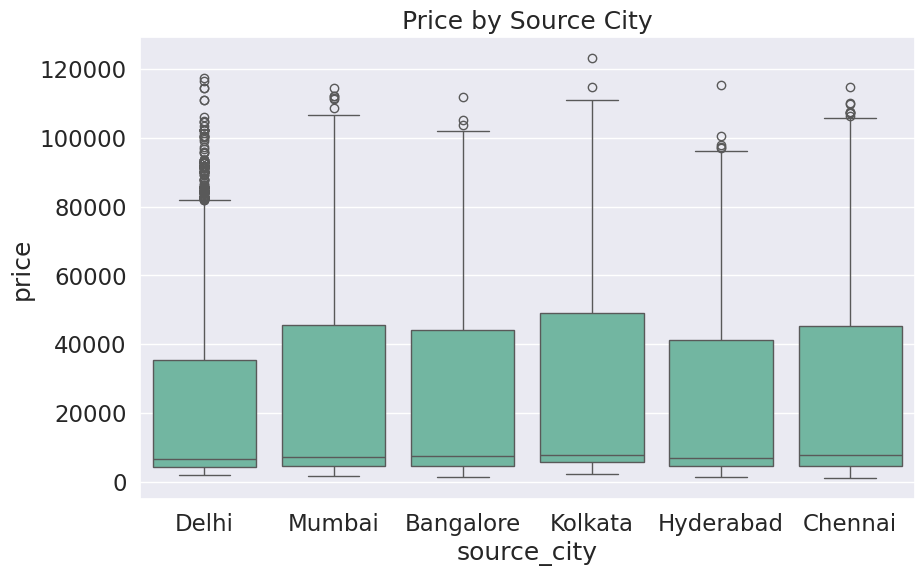

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(x="source_city", y="price", data=df)
plt.title("Price by Source City")
plt.show()

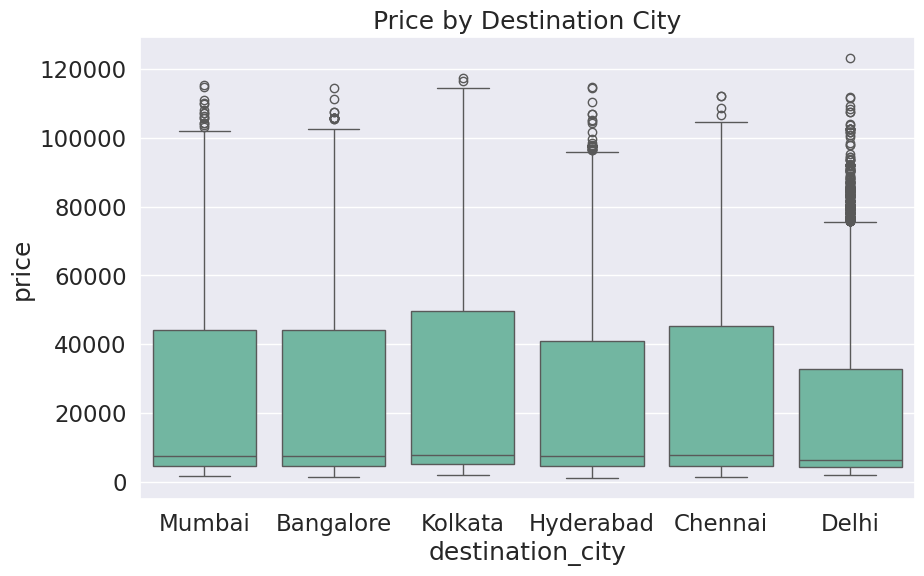

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(x="destination_city", y="price", data=df)
plt.title("Price by Destination City")
plt.show()

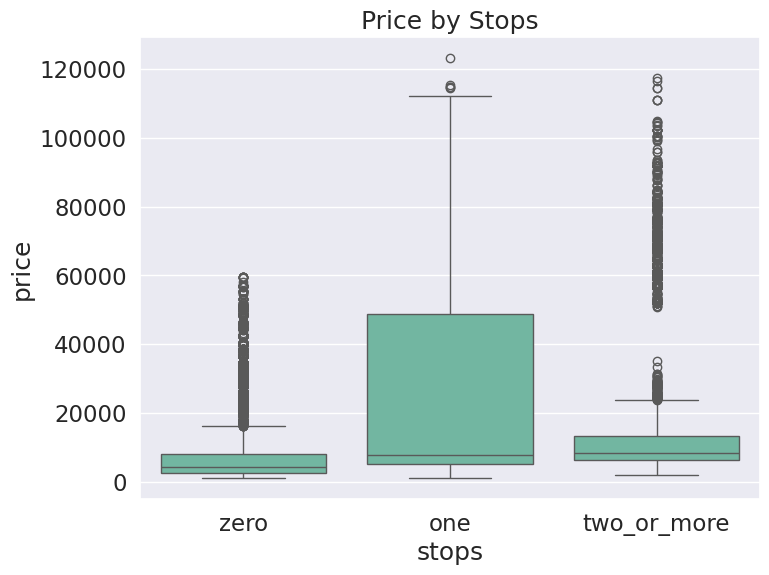

In [79]:
plt.figure(figsize=(8,6))
sns.boxplot(x="stops", y="price", data=df)
plt.title("Price by Stops")
plt.show()

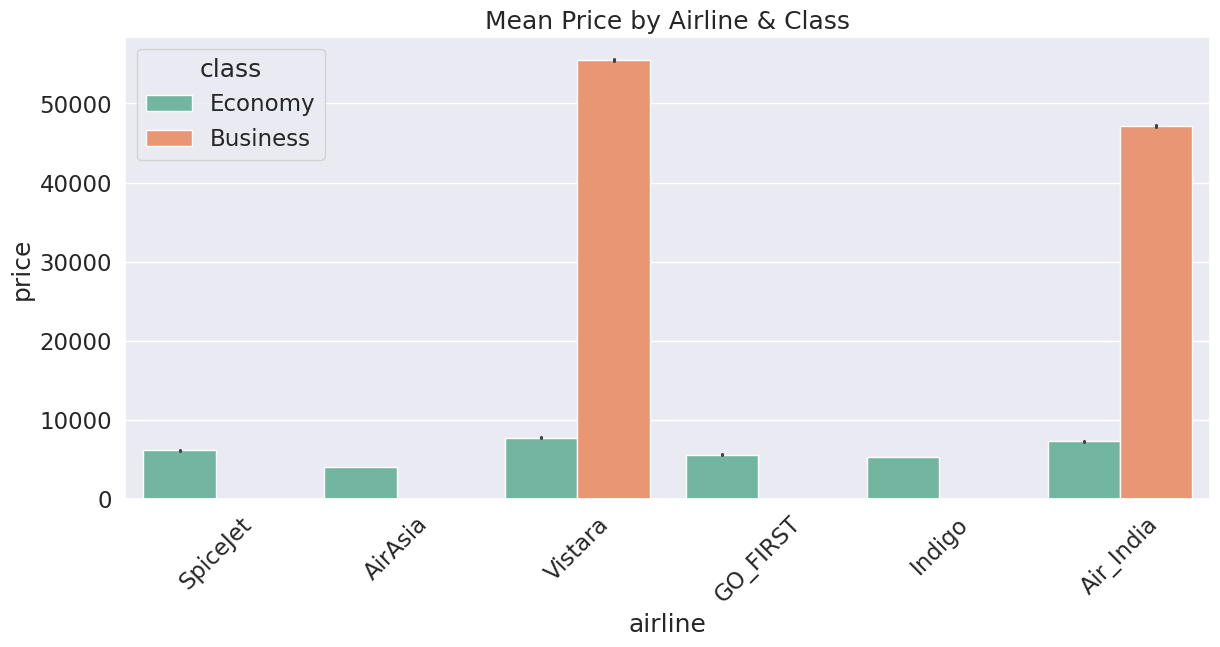

In [80]:
plt.figure(figsize=(14,6))
sns.barplot(x="airline", y="price", hue="class", data=df, estimator="mean")
plt.title("Mean Price by Airline & Class")
plt.xticks(rotation=45)
plt.show()

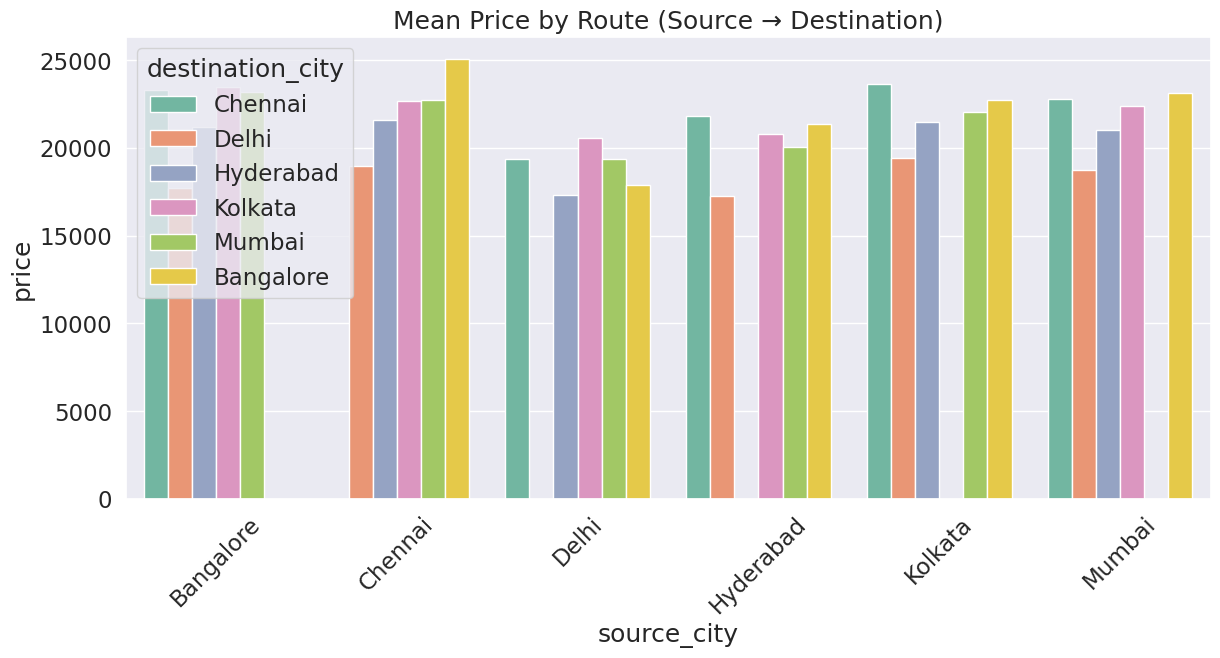

In [81]:
mean_price_routes = df.groupby(["source_city", "destination_city"])["price"].mean().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x="source_city", y="price", hue="destination_city", data=mean_price_routes)
plt.title("Mean Price by Route (Source → Destination)")
plt.xticks(rotation=45)
plt.show()

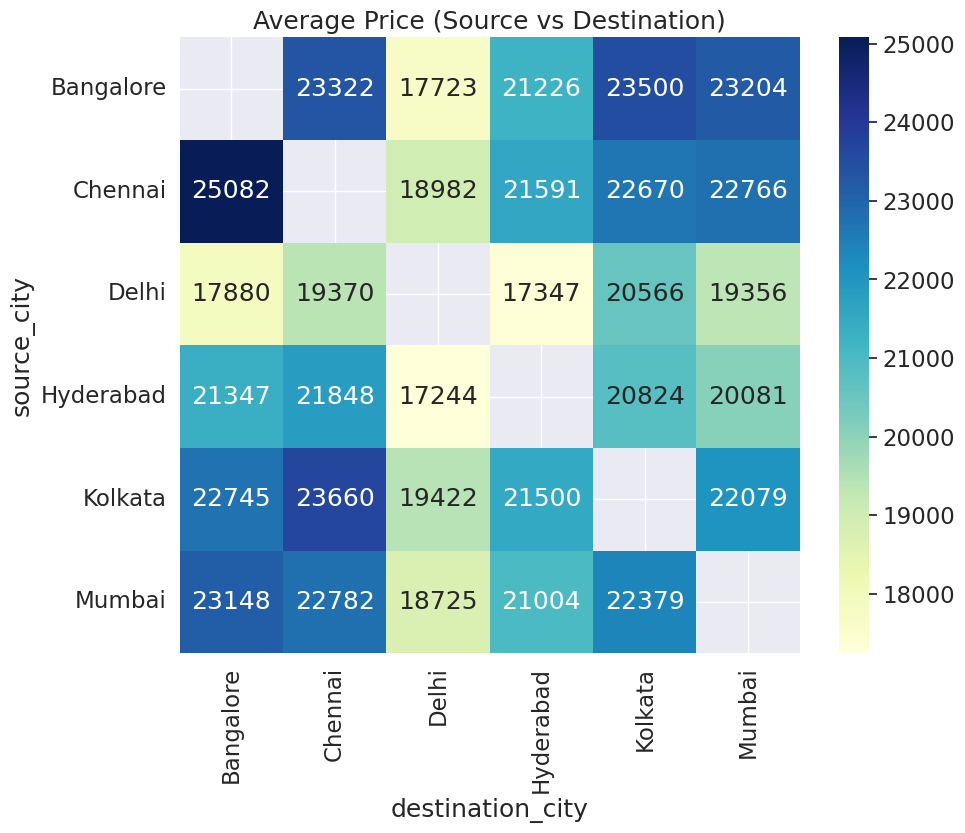

In [82]:
pivot_routes = df.pivot_table(index="source_city", columns="destination_city", values="price", aggfunc="mean")

plt.figure(figsize=(10,8))
sns.heatmap(pivot_routes, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price (Source vs Destination)")
plt.show()

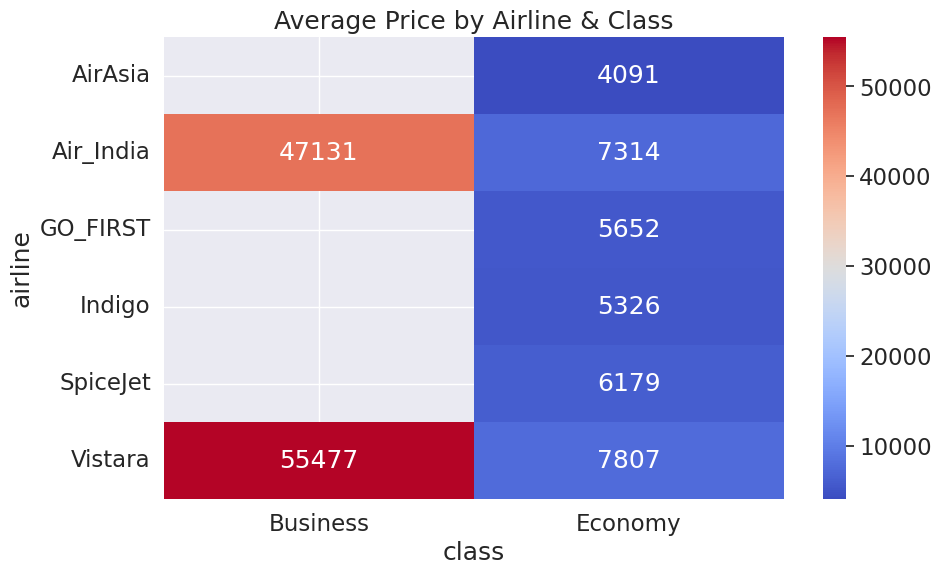

In [83]:
pivot_airline_class = df.pivot_table(index="airline", columns="class", values="price", aggfunc="mean")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_airline_class, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Average Price by Airline & Class")
plt.show()

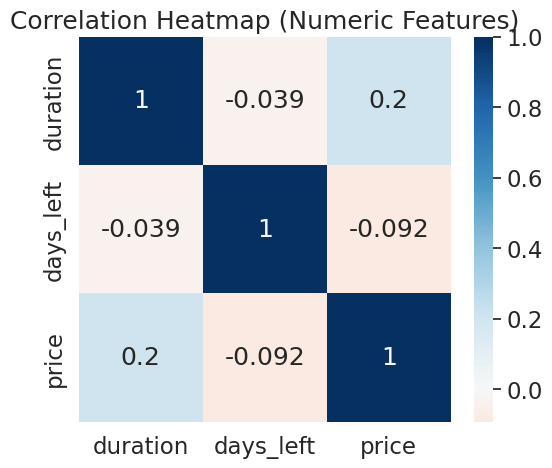

In [84]:
numeric_df = df[["duration", "days_left", "price"]]
plt.figure(figsize=(6,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdBu", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

In [86]:
df.head()

airline flight source_city departure_time stops   arrival_time  \
0  SpiceJet     SG       Delhi        Evening  zero          Night   
1  SpiceJet     SG       Delhi  Early_Morning  zero        Morning   
2   AirAsia     I5       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara     UK       Delhi        Morning  zero      Afternoon   
4   Vistara     UK       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

In [87]:
X = df.drop(columns=['price'])
y = df['price']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
categorical_cols = ['airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city']


In [90]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=False)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=False)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [97]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [111]:
encoder1 = OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']])
X_train_encoded['stops_encoded'] = encoder1.fit_transform(X_train_encoded[['stops']])
X_test_encoded['stops_encoded'] = encoder1.transform(X_test_encoded[['stops']])

In [104]:
encoder2 = OrdinalEncoder(categories=[['Economy', 'Business']])
X_train_encoded['class_encoded'] = encoder2.fit_transform(X_train_encoded[['class']])
X_test_encoded['class_encoded'] = encoder2.transform(X_test_encoded[['class']])

In [105]:
scaler = MinMaxScaler()
X_train_encoded[['duration', 'days_left']] = scaler.fit_transform(X_train_encoded[['duration', 'days_left']])
X_test_encoded[['duration', 'days_left']] = scaler.transform(X_test_encoded[['duration', 'days_left']])

In [114]:
X_train_encoded.drop(columns=['stops', 'class'], inplace=True)
X_test_encoded.drop(columns=['stops', 'class'], inplace=True)

In [115]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [118]:
y_train_pred = model.predict(X_train_encoded)
y_test_pred = model.predict(X_test_encoded)

In [119]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTrain Performance:")
print(f"MAE: {train_mae:.2f}")
print(f"MSE: {train_mse:.2f}")
print(f"R²: {train_r2:.4f}")

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Performance:")
print(f"MAE: {test_mae:.2f}")
print(f"MSE: {test_mse:.2f}")
print(f"R²: {test_r2:.4f}")


Train Performance:
MAE: 4533.69
MSE: 46547166.75
R²: 0.9097

Test Performance:
MAE: 4481.31
MSE: 45732602.20
R²: 0.9111


In [120]:
import joblib


In [121]:
joblib.dump(model, "linear_regression_model.pkl")
print("Model saved successfully!")

Model saved successfully!


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
